<a href="https://colab.research.google.com/github/diwandahiya304/Sentiment-Analysis/blob/main/sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all dependencies


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loading of data

In [19]:
%%time
df=pd.read_csv(r'/IMDB-Dataset.csv',encoding='latin-1')

CPU times: user 4.69 s, sys: 724 ms, total: 5.41 s
Wall time: 5.45 s


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data cleaning and preprocessing

In [29]:
#customize stopword as per data
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
new_stopwords=["movie","one","film","would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

In [34]:
#Data cleaning and preprocessing pipeline
#Removing special character
def remove_special_character(content):
  return re.sub('\[[^&@#!]]*\]','',content)

#Removing URL's
def remove_url(content):
  return re.sub(r'http\S+','',content)

#Removing the stopwords from text
def remove_stopwords(content):
  clean_data=[]
  for i in content.split():
    if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
      clean_data.append(i.strip().lower())
  return " ".join(clean_data)

#Expansion of english contractions
def contraction_expansion(content):
  content=re.sub(r"won\'t","would not",content)
  content=re.sub(r"can\'t","can not",content)
  content=re.sub(r"don\'t","do not",content)
  content=re.sub(r"shouldn\'t","should not",content)
  content=re.sub(r"needn\'t","need not",content)
  content=re.sub(r"hasn\'t","has not",content)
  content=re.sub(r"haven\'t","have not",content)
  content=re.sub(r"weren\'t","were not",content)
  content=re.sub(r"mightn\'t","might not",content)
  content=re.sub(r"didn\'t","did not",content)
  content=re.sub(r"n\'t"," not",content)
  content=re.sub(r"\'re"," are",content)
  content=re.sub(r"\'s"," is",content)
  content=re.sub(r"\'d"," would",content)
  content=re.sub(r"\'ll"," will",content)
  content=re.sub(r"\'t"," not",content)
  content=re.sub(r"\'ve"," have",content)
  content=re.sub(r"\'m"," am",content)
  return content

#Data preprocessing
def data_cleaning(content):
  content=remove_special_character(content)
  content=remove_url(content)
  content=contraction_expansion(content)
  content=remove_stopwords(content)
  return content

In [35]:
%%time
#Data cleaning
df['Reviews']=df['Reviews'].apply(data_cleaning)
df['Reviews'].head(5)

CPU times: user 21.1 s, sys: 0 ns, total: 21.1 s
Wall time: 21.3 s


0    watched conditional see films not caught dead ...
1    writing hopes gets put previous review anyone ...
2    write scathing review turd going making observ...
3    saw previous spoof movies two horrible know al...
4    saw day early free still feel like got ripped ...
Name: Reviews, dtype: object

Data Overview

In [36]:
#checking for missing values\
df.isna().sum()

Ratings      0
Reviews      0
Movies      25
Resenhas     0
dtype: int64

In [37]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [38]:
df['Reviews'].describe()

count     150000
unique    149745
top             
freq          10
Name: Reviews, dtype: object

In [39]:
print('Unique reviews:%s' % df.Reviews.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No. of ratings:%s'% df.Ratings.count())

Unique reviews:149745
Unique movie names:14206
No. of ratings:150000


Exploratory Data Analysis

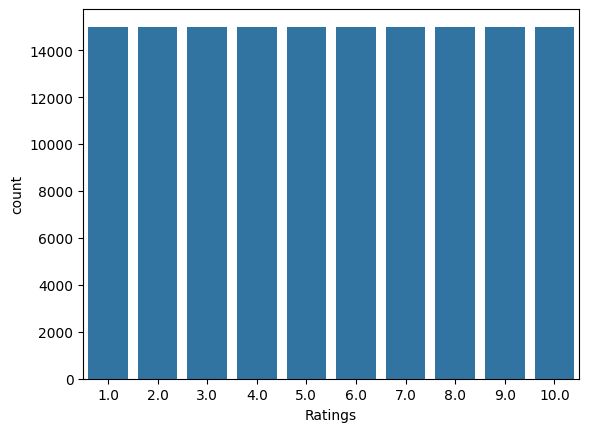

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [40]:
#checking for class imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())